# Klasifikasi Jenis Wine dengan Decision Tree, K-Nearest Neighbors

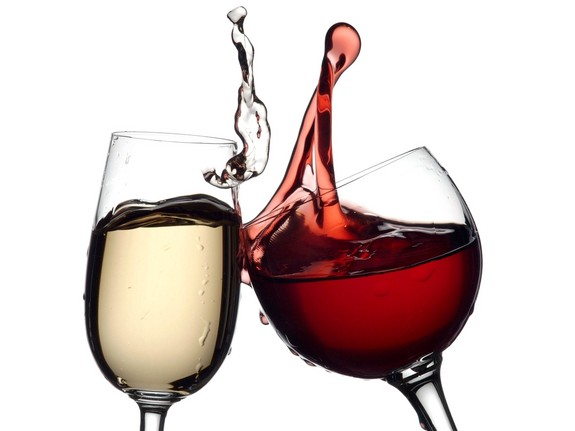

# Import Library dan Load Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#List nama feature
nama_kolom = ['Wine', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
              'Total phenols', 'Flavanoids', 'Non Flavanoids phenols', 'Proanthocyanins',
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

#Load data dan lihat data
dataku = pd.read_csv('wine.data', header=None, names=nama_kolom)
dataku.head()

,Wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Non Flavanoids phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
print(dataku.shape)

(178, 14)


In [ ]:
#Cek missing value
missing_value_cek = dataku.isnull().sum()
missing_value_cek

Wine                            0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Non Flavanoids phenols          0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

# Split Data

In [ ]:
#Pisah Feature dan Target
X = dataku.drop(columns='Wine', axis=1)
y = dataku['Wine']

# Pre processing Data

Seleksi Feature jadi 8

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Contoh dengan SelectKBest dan f-score
selector = SelectKBest(score_func=f_classif, k=8)  # Pilih 8 fitur terbaik
X_new = selector.fit_transform(X, y)

In [ ]:
# Membuat data frame untuk feature yang sudah dipilih
nama_feature = ['Alcohol', 'Malic acid', 'Total phenols', 'Flavanoids', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
data_X_new = pd.DataFrame(X_new, columns = nama_feature)
data_X_new.head()

,Alcohol,Malic acid,Total phenols,Flavanoids,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.80,3.06,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.65,2.76,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.80,3.24,5.68,1.03,3.17,1185.0
3,14.37,1.95,3.85,3.49,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.80,2.69,4.32,1.04,2.93,735.0


Standarisasi

In [ ]:
#Standarisasi feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized = scaler.fit_transform(data_X_new)

stardardized_data = pd.DataFrame(standardized, columns = nama_feature)
stardardized_data.head()

,Alcohol,Malic acid,Total phenols,Flavanoids,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.808997,1.034819,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,0.568648,0.733629,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,0.808997,1.215533,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,2.491446,1.466525,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,0.808997,0.663351,-0.319276,0.362177,0.449601,-0.037874


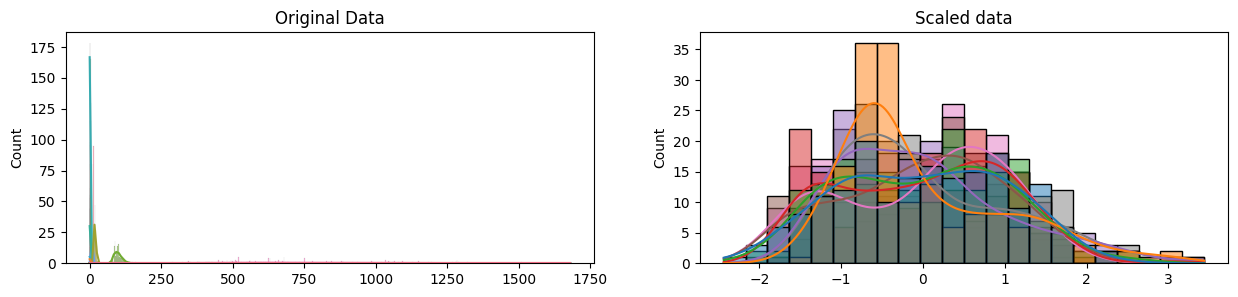

In [ ]:
# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(X, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(stardardized_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

Lihat banyaknya data label class

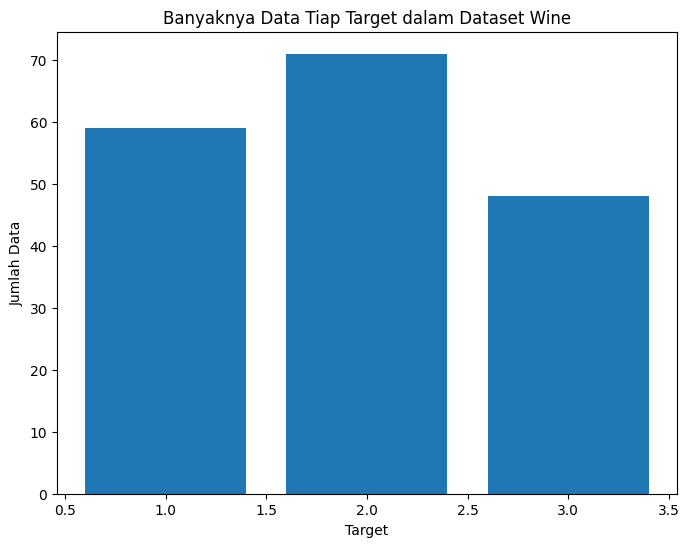

{1: 59, 2: 71, 3: 48}


In [ ]:
# Membuat array dengan jumlah unik target dan jumlah data untuk masing-masing target
unique_targets, target_counts = np.unique(y, return_counts=True)

# Membuat plot batang untuk menampilkan banyaknya data untuk tiap target
plt.figure(figsize=(8, 6))
plt.bar(unique_targets, target_counts)
plt.xlabel('Target')
plt.ylabel('Jumlah Data')
plt.title('Banyaknya Data Tiap Target dalam Dataset Wine')
plt.show()

unique_targets, target_counts = np.unique(y, return_counts=True)
print(dict(zip(unique_targets, target_counts)))

Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

resamp = RandomOverSampler()
balX, balY = resamp.fit_resample(stardardized_data, y)

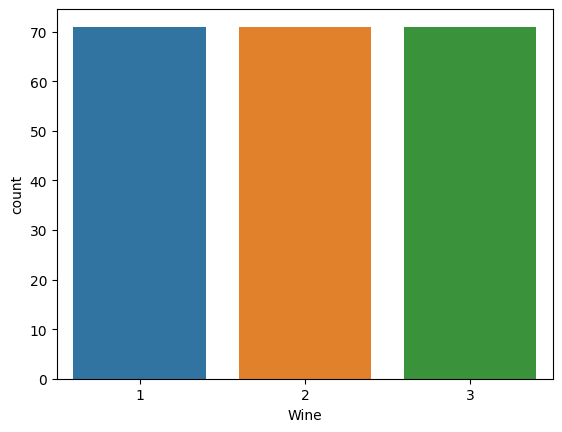

{1: 71, 2: 71, 3: 71}


In [ ]:
sns.countplot(x=balY)
plt.show()

unique_targets, target_counts = np.unique(balY, return_counts=True)
print(dict(zip(unique_targets, target_counts)))

In [ ]:
X = balX
y = balY

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Buat object Model Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
cv_validate_DT=cross_validate(clf, X, y, cv=12, return_train_score=True)
cv_score_DT=cross_val_score(clf, X, y, cv=12)

In [ ]:
print (cv_validate_DT['train_score'].mean(), cv_validate_DT['test_score'].mean())

1.0 0.9629629629629629


In [ ]:
print(cv_score_DT.mean()) #test_score

0.94880174291939


Tuning Hyperparameter

<function matplotlib.pyplot.show(close=None, block=None)>

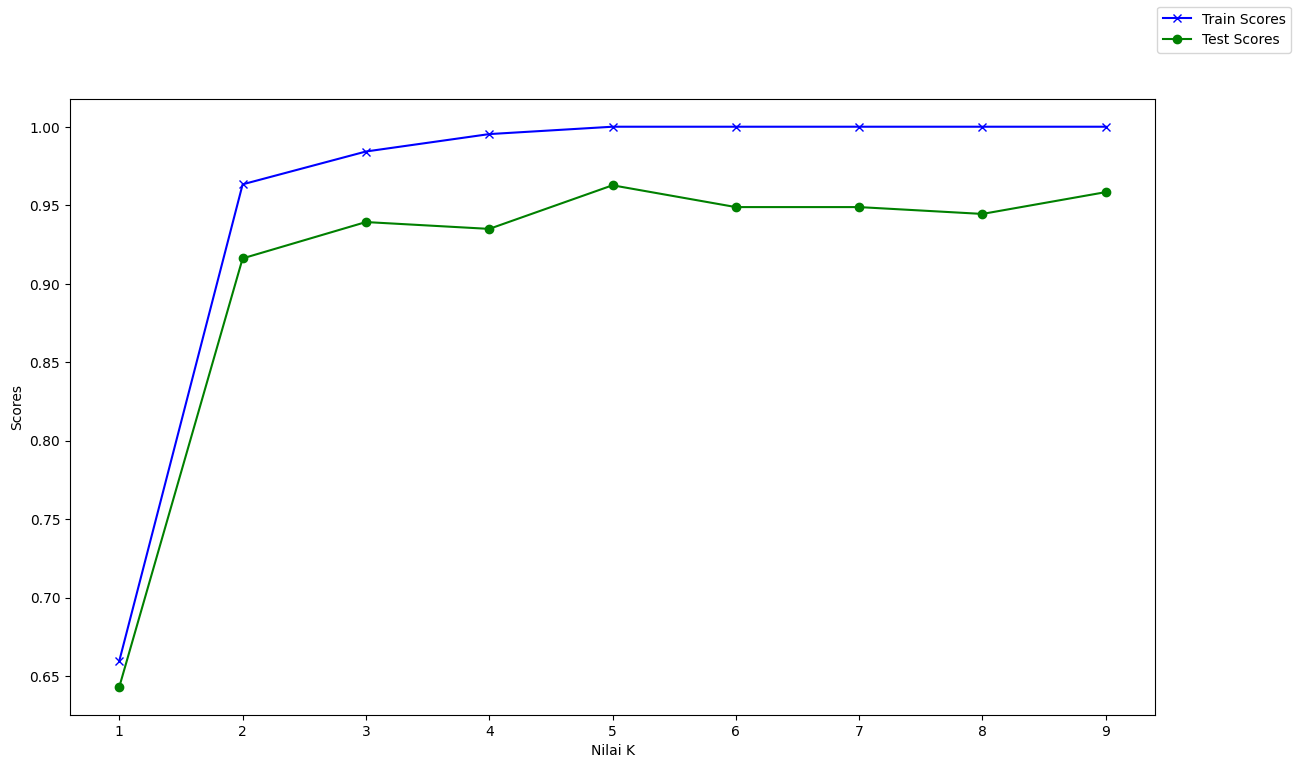

In [ ]:
def clf_predict(k) :
    model_clf = DecisionTreeClassifier(max_depth=k)
    score = cross_validate(model_clf ,X, y, cv=12, return_train_score=True)
    train_score = score['train_score'].mean()
    test_score = score['test_score'].mean()
    return train_score, test_score

#Tuning Hyperparameter max_depth Decision Tree manual
train_scores=[]
test_scores=[]
for k in range (1,10):
    train_score, test_score=clf_predict(k)
    train_scores.append(train_score)
    test_scores.append(test_score)


fig,ax = plt.subplots(figsize=(14,8))
ax.plot(range(1,10),train_scores, marker='x', color='b', label='Train Scores')
ax.plot(range(1,10),test_scores, marker='o', color='g', label='Test Scores')
ax.set_xlabel('Nilai K')
ax.set_ylabel('Scores')
fig.legend()
plt.show

Cross Validation dengna GridSearchCV

In [ ]:
#Splid data dengan RepeatedStratifiedKFold dan Tuning Hyperparameter dengan GridSearchCV
cv_method = RepeatedStratifiedKFold(n_splits=10,  n_repeats=3, random_state=999)

param_grid_clf = {'criterion':['gini', 'entropy', 'log_loss'], 'max_depth':np.arange(1,10),}
scoring_metrics = ['accuracy', 'f1_macro']

gs_clf = GridSearchCV(estimator=clf, param_grid=param_grid_clf, cv=cv_method,verbose=1, scoring=scoring_metrics, refit='accuracy')
gs_clf.fit(X,y)

# Menampilkan parameter terbaik dan skor terbaik untuk akurasi dan F1-score macro
print("Best Parameters (Accuracy):", gs_clf.best_params_)
print("Best Score (Accuracy):", gs_clf.best_score_)
print("Best Score (F1 Macro):", gs_clf.cv_results_['mean_test_f1_macro'][gs_clf.best_index_])

Fitting 30 folds for each of 27 candidates, totalling 810 fits
Best Parameters (Accuracy): {'criterion': 'entropy', 'max_depth': 6}
Best Score (Accuracy): 0.97987012987013
Best Score (F1 Macro): 0.9797808781632311


# K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=43, weights='distance')

cv_validate_KNN=cross_validate(knn ,X, y, cv=12, return_train_score=True)
cv_score_KNN=cross_val_score(knn, X, y, cv=12)

In [ ]:
print (cv_validate_KNN['train_score'].mean(), cv_validate_KNN['test_score'].mean())

1.0 0.971949891067538


In [ ]:
print(cv_score_KNN.mean()) #test_score

0.971949891067538


Tuning Hyperparameter

<function matplotlib.pyplot.show(close=None, block=None)>

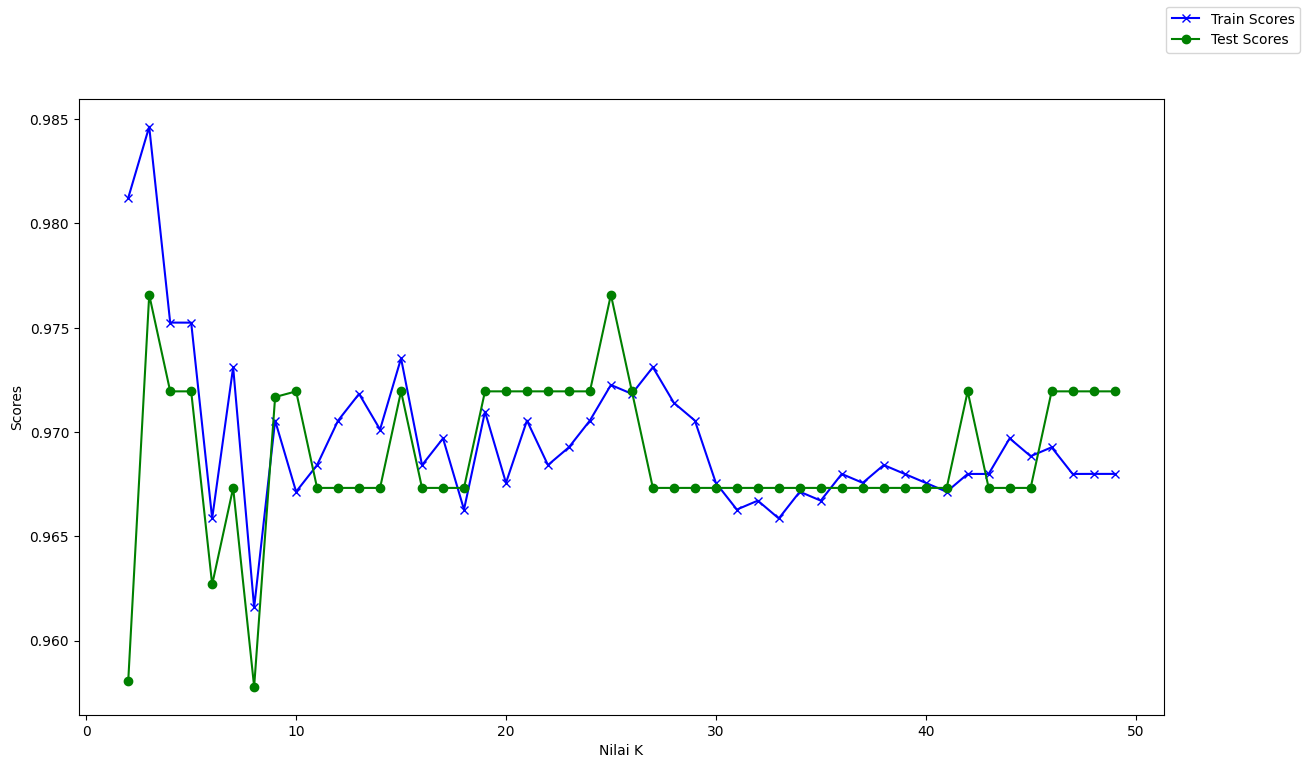

In [ ]:
def knn_predict(k) :
    model_knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_validate(model_knn ,X, y, cv=12, return_train_score=True)
    train_score = score['train_score'].mean()
    test_score = score['test_score'].mean()
    return train_score, test_score

#Tuning Hyperparameter KNN manual
train_scores=[]
test_scores=[]
for k in range (2,50):
    train_score, test_score=knn_predict(k)
    train_scores.append(train_score)
    test_scores.append(test_score)


fig,ax = plt.subplots(figsize=(14,8))
ax.plot(range(2,50),train_scores, marker='x', color='b', label='Train Scores')
ax.plot(range(2,50),test_scores, marker='o', color='g', label='Test Scores')
ax.set_xlabel('Nilai K')
ax.set_ylabel('Scores')
fig.legend()
plt.show

Tuning Hyperparameter dengan GridSearchCV

In [ ]:
#Tuning Hyperparameter KNN otomatis dengan GridSearchCV
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(5,50),'weights':['distance','uniform']}
scoring_metrics = ['accuracy', 'f1_macro']

gscv=GridSearchCV(model, param_grid=param_grid, scoring=scoring_metrics, cv=5, refit='accuracy')
gscv.fit(X,y)

# Menampilkan parameter terbaik dan skor terbaik untuk akurasi dan F1-score macro
print("Best Parameters (Accuracy):", gscv.best_params_)
print("Best Score (Accuracy):", gscv.best_score_)
print("Best Score (F1 Macro):", gscv.cv_results_['mean_test_f1_macro'][gscv.best_index_])

Best Parameters (Accuracy): {'n_neighbors': 19, 'weights': 'distance'}
Best Score (Accuracy): 0.9766334440753045
Best Score (F1 Macro): 0.9765775359166163


# Naive Bayers

In [ ]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
cv_score1=cross_validate(model,X,y,cv=10, return_train_score=True)
cv_score2=cross_val_score(model,X,y,cv=10)

print (cv_score1['train_score'].mean(), cv_score1['test_score'].mean())

0.9645369764397905 0.9536796536796537


In [ ]:
print(cv_score2.mean()) #test_score

0.9536796536796537


Tuning Hyperparameter

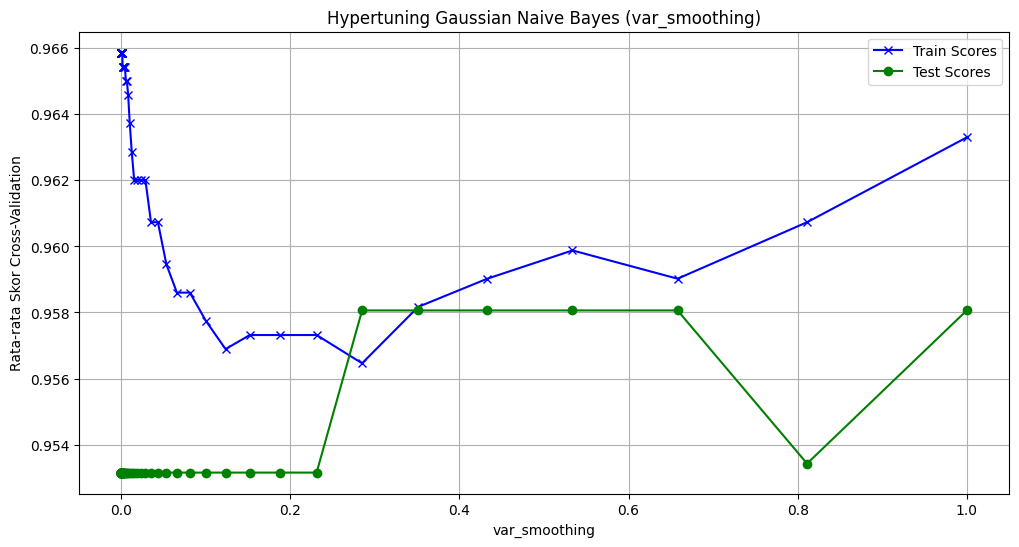

In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt

def gnb_predict(var_smoothing):
    model_gnb = GaussianNB(var_smoothing=var_smoothing)
    scores = cross_validate(model_gnb, X, y, cv=12, return_train_score=True)
    return scores['train_score'].mean(), scores['test_score'].mean()

var_smoothing_values = np.logspace(0, -9, num=100)  # Sesuaikan num sesuai kebutuhan

mean_train_scores = []
mean_test_scores = []
for var_smoothing in var_smoothing_values:
    train_score, test_score = gnb_predict(var_smoothing)
    mean_train_scores.append(train_score)
    mean_test_scores.append(test_score)

# Plot hasil hypertuning
plt.figure(figsize=(12, 6))
plt.plot(var_smoothing_values, mean_train_scores, marker='x', linestyle='-', color='b', label='Train Scores')
plt.plot(var_smoothing_values, mean_test_scores, marker='o', linestyle='-', color='g', label='Test Scores')
plt.title('Hypertuning Gaussian Naive Bayes (var_smoothing)')
plt.xlabel('var_smoothing')
plt.ylabel('Rata-rata Skor Cross-Validation')
plt.legend()
plt.grid(True)
plt.show()


Tuning Hyperparameter dengan GridSearchCV

In [ ]:
#Splid data dengan RepeatedStratifiedKFold dan Tuning Hyperparameter dengan GridSearchCV
cv_method = RepeatedStratifiedKFold(n_splits=10,  n_repeats=3, random_state=999)

param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
scoring_metrics = ['accuracy', 'f1_macro']

gs_NB = GridSearchCV(estimator=model, param_grid=param_grid_nb, cv=cv_method,verbose=1,scoring=scoring_metrics, refit='accuracy')
gs_NB.fit(X,y)

# Menampilkan parameter terbaik dan skor terbaik untuk akurasi dan F1-score macro
print("Best Parameters (Accuracy):", gs_NB.best_params_)
print("Best Score (Accuracy):", gs_NB.best_score_)
print("Best Score (F1 Macro):", gs_NB.cv_results_['mean_test_f1_macro'][gs_NB.best_index_])

Fitting 30 folds for each of 100 candidates, totalling 3000 fits
Best Parameters (Accuracy): {'var_smoothing': 1.0}
Best Score (Accuracy): 0.9577922077922079
Best Score (F1 Macro): 0.9568305387423035


# Support Vector Machine

In [ ]:
#Liniear SVC
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

clf = LinearSVC()

# Train Decision Tree Classifer
cv_validate_SVC=cross_validate(clf, X, y, cv=12, return_train_score=True)
cv_score_SVC=cross_val_score(clf, X, y, cv=12)

print(cv_validate_SVC['train_score'].mean(), cv_validate_SVC['test_score'].mean())

0.9914638932496076 0.9814814814814815


In [ ]:
print(cv_score_SVC.mean()) #test_score

0.9814814814814815


Tuning Hyperparameter

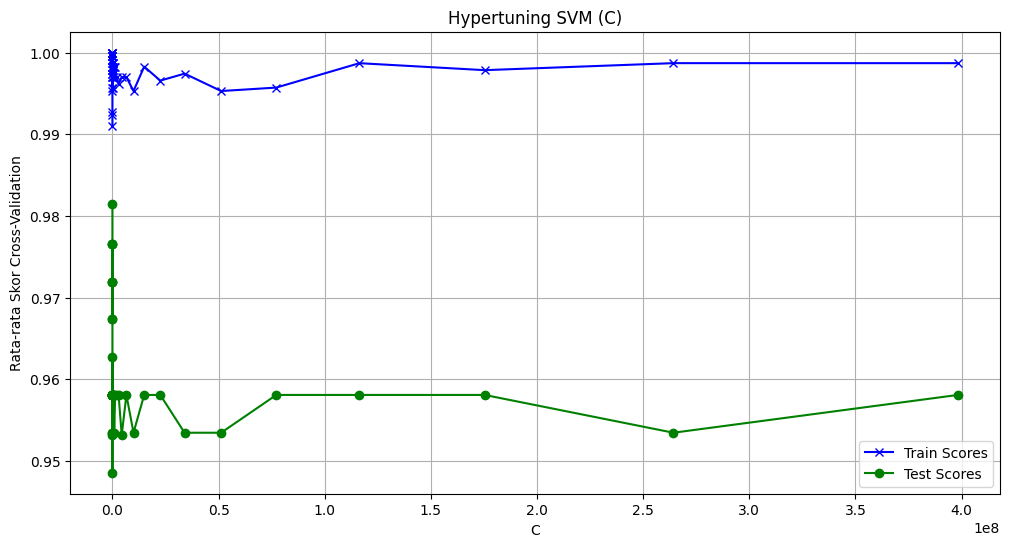

In [ ]:
def svm_predict(C):
    clf = LinearSVC(C=C)
    scores = cross_validate(clf, X, y, cv=12, return_train_score=True)
    return scores['train_score'].mean(), scores['test_score'].mean()

C_values = np.logspace(start = -15, stop = 1000, base = 1.02)

mean_train_scores = []
mean_test_scores = []
for C in C_values:
    train_score, test_score = svm_predict(C)
    mean_train_scores.append(train_score)
    mean_test_scores.append(test_score)

# Plot hasil hypertuning
plt.figure(figsize=(12, 6))
plt.plot(C_values, mean_train_scores, marker='x', linestyle='-', color='b', label='Train Scores')
plt.plot(C_values, mean_test_scores, marker='o', linestyle='-', color='g', label='Test Scores')
plt.title('Hypertuning SVM (C)')
plt.xlabel('C')
plt.ylabel('Rata-rata Skor Cross-Validation')
plt.legend()
plt.grid(True)
plt.show()

Tuning Hyperparameter dengan GridSearchCV

In [ ]:
#Splid data dengan RepeatedStratifiedKFold dan Tuning Hyperparameter dengan GridSearchCV
cv_method = RepeatedStratifiedKFold(n_splits=10,  n_repeats=3, random_state=999)
scoring_metrics = ['accuracy', 'f1_macro']

c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c}


grid = GridSearchCV(clf, param_grid =param_grid, cv=cv_method, n_jobs=-1, scoring=scoring_metrics, refit='accuracy')
grid.fit(X, y)

# Menampilkan parameter terbaik dan skor terbaik untuk akurasi dan F1-score macro
print("Best Parameters (Accuracy):", grid.best_params_)
print("Best Score (Accuracy):", grid.best_score_ * 100)
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X, y) * 100 ) )
print("Best Score (F1 Macro):", grid.cv_results_['mean_test_f1_macro'][grid.best_index_])

Best Parameters (Accuracy): {'C': 0.7430147299885189}
Best Score (Accuracy): 97.80663780663782
Best estimator accuracy on test set 99.06 
Best Score (F1 Macro): 0.9778706696353755
